# 1. Introduction
Sleep is a vital aspect of human health and well-being, influencing physical, mental, and emotional states. The Sleep Health and Lifestyle Dataset provides a comprehensive collection of data related to sleep patterns, lifestyle habits, and health indicators. The dataset consists of 400 rows and 13 columns, encompassing a wide range of features such as gender, age, occupation, sleep duration, sleep quality, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

The primary goal of this project is to perform a thorough Exploratory Data Analysis (EDA) to gain insights into the dataset and investigate potential relationships among the variables. This involves data cleaning, handling missing values, visualizing distributions, and examining correlations. Additionally, various statistical hypothesis tests will be conducted to explore significant patterns and relationships in the data.

The key hypotheses to be tested include:

- Whether women's sleep duration follows a normal distribution.
- Whether higher daily steps contribute to better sleep quality.
- Whether stress levels vary significantly among different occupations.
- Whether BMI categories differ significantly in terms of blood pressure.
- Whether people with sleep disorders have higher heart rates than those without any sleep disorder.
- Furthermore, additional hypotheses may be formulated to gain deeper insights into the interactions between different health and lifestyle factors. The results and findings will be presented using appropriate statistical tests and visualizations to ensure clarity and understanding.

By analyzing this dataset, we aim to identify potential correlations and trends related to sleep health and lifestyle, which can help develop strategies for promoting better sleep and overall well-being.

## 1.1 Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 2. Loading the dataset
Using the .shape function, we see that the dataset has 374 rows (individuals) and 13 columns (features). However, not all of these features are necessary for our analysis. Some may be irrelevant or redundant, so we'll carefully select the most informative ones to focus on meaningful insights.

In [2]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print(data.shape)

(374, 13)



 Using the .head() function in pandas, we get a quick glimpse of the dataset, including the first few rows and the column names. In this dataset, we have 13 features, which consist of:
- PersonID: A unique identifier for each individual (categorical, not useful for training).
- Gender: Categorical (e.g., Male, Female).
- Age: Numerical (integer).
- Occupation: Categorical (e.g., Student, Engineer).
- Sleep Duration: Numerical (hours of sleep per night).
- Quality of Sleep: Numerical (scale from 1 to 10).
- Physical Activity Level: Numerical (minutes per day).
- Stress Level: Numerical (usually a score or scale).
- BMI Category: Categorical (e.g., Normal, Overweight).
- Blood Pressure: Numerical (usually in mmHg).
- Heart Rate: Numerical (beats per minute).
- Daily Steps: Numerical (step count).
- Sleep Disorder: Categorical (presence or absence of a disorder).

Since the PersonID is just a unique identifier, it doesn’t carry any meaningful information for training the model and will be dropped during preprocessing. Understanding the data types and relevance of each feature helps us decide how to clean and preprocess the dataset effectively.

In [3]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Value
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Value
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Value
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Value
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Value
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,No Value


Now we have to look for null values in each column. After using .info we make sure that we have not null values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


The .describe() function in pandas provides statistical summaries of numerical columns in a DataFrame.

In [5]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
print(data.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


# 3. Visualization

Visualizing both numerical and categorical data helps us understand distributions, relationships, and patterns, providing a better sense of the dataset before proceeding with analysis or modeling.

Note : ID is not needed so we don't visualize it

# 3.1 Visualizing numerical data

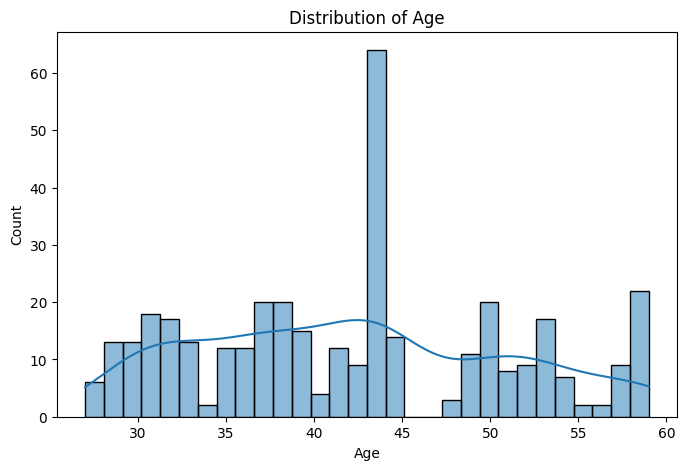

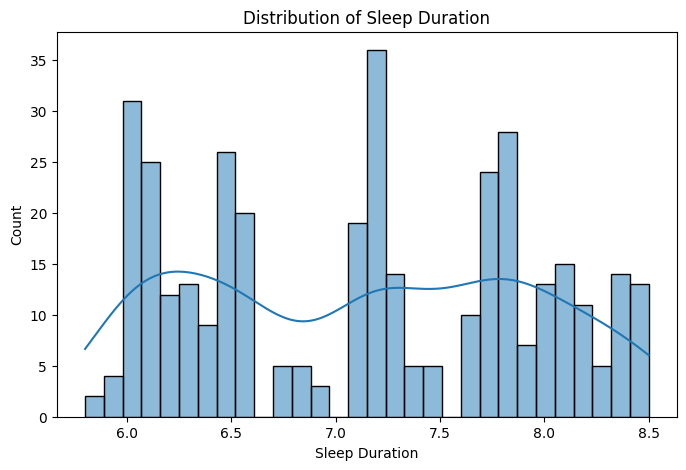

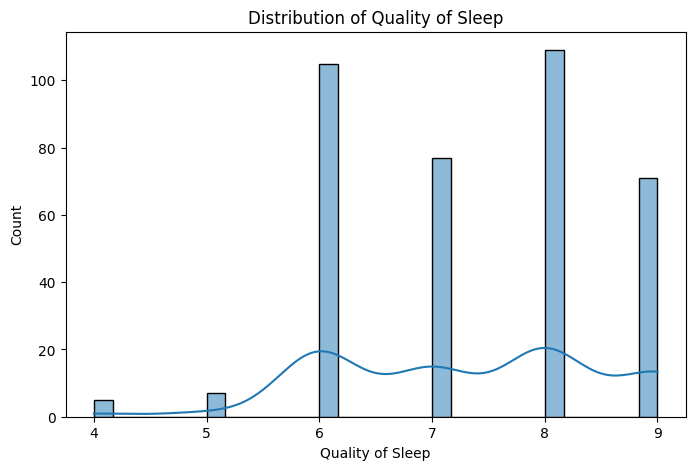

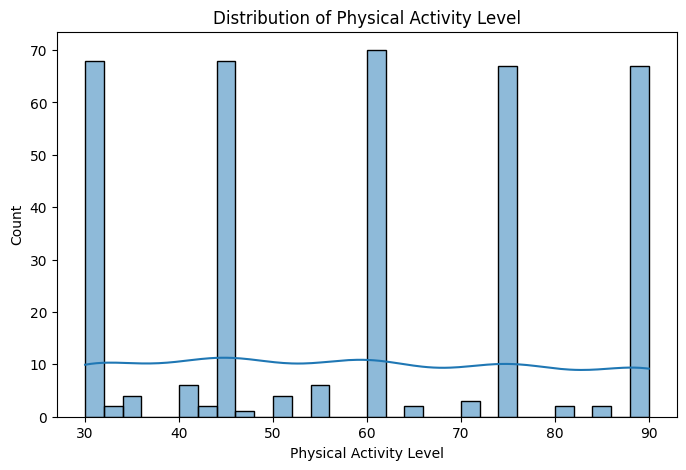

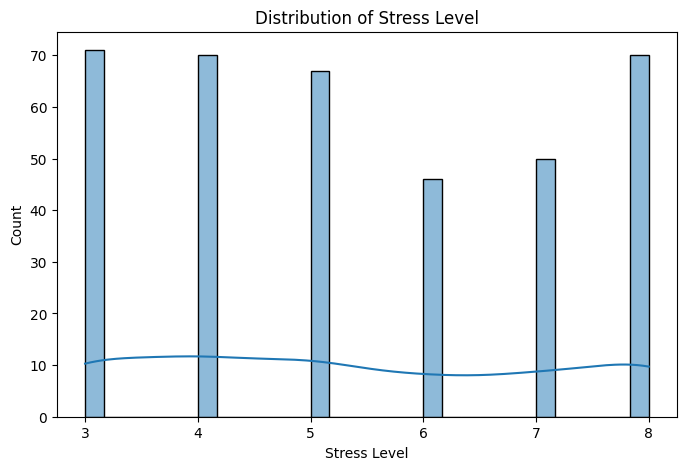

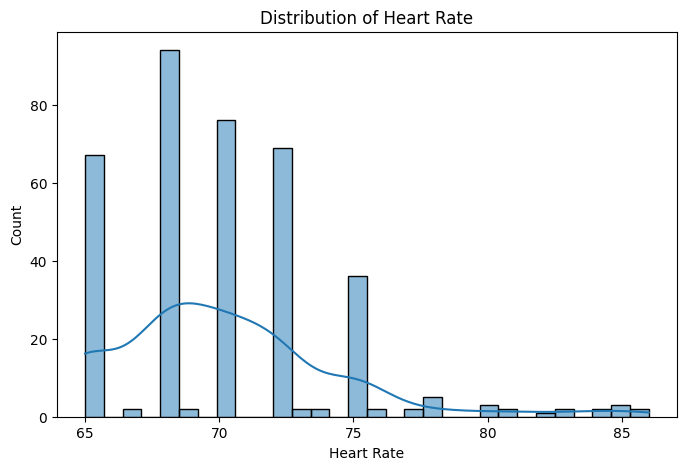

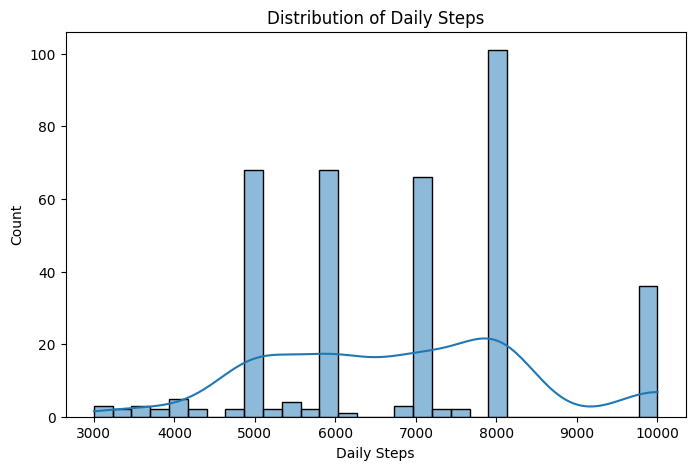

In [8]:
numerical_columns = [ 'Age', 'Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level','Heart Rate', 'Daily Steps'] 

for col in numerical_columns:
    plt.figure(figsize=(8, 5))  
    sns.histplot(data[col], kde=True, bins=30)  
    plt.title(f'Distribution of {col}')  
    plt.show()  


# 3.2 Visualizing categorical data

In [1]:
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']  

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    data[col].fillna("None").value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


NameError: name 'plt' is not defined

# 4. Exploratory Data Analysis (EDA)

In the EDA phase, we also focus on understanding the relationships between features. Using visualizations like scatter plots, pair plots, and correlation heatmaps, we can explore how different features are related. This helps us identify potential correlations or dependencies between variables, which can guide us in feature selection and understanding key factors influencing sleep patterns.


first we  need to know how many different unique values are available in each column:

In [2]:
data.nunique()

NameError: name 'data' is not defined

### A little mix:

In [34]:
print(data['Gender'].unique())
print(data['Sleep Disorder'].unique())

['Male' 'Female']
['No Value' 'Sleep Apnea' 'Insomnia']


In [10]:
data['Sleep Disorder'].fillna('None', inplace=True)
result = data.groupby('Sleep Disorder')['Gender'].value_counts()
print(result)


Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
No Value        Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64


C:\Users\Sara\AppData\Local\Temp\ipykernel_10664\2045559885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sleep Disorder'].fillna('None', inplace=True)


# 4.1 Advanced Visualization

4.1.1. Bar Plot: Gender Distribution by Sleep Disorder
This bar plot shows the distribution of genders among different sleep disorders.
Bar plots are useful for visualizing categorical data distribution.

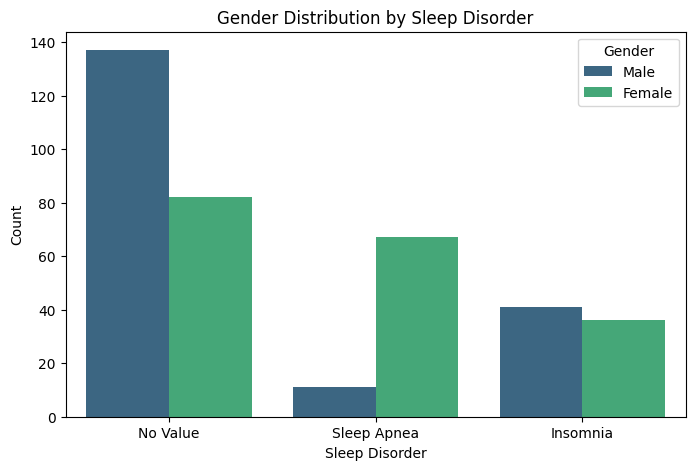

In [36]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Sleep Disorder', hue='Gender', palette='viridis')
plt.title('Gender Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()


4.1.2. Box Plot: Sleep Duration by Sleep Disorder
The box plot helps visualize the distribution and median sleep duration across different sleep disorders.
It also helps identify potential outliers in the data.

C:\Users\Sara\AppData\Local\Temp\ipykernel_20668\2114634871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Sleep Disorder', y='Sleep Duration', palette='Set2')


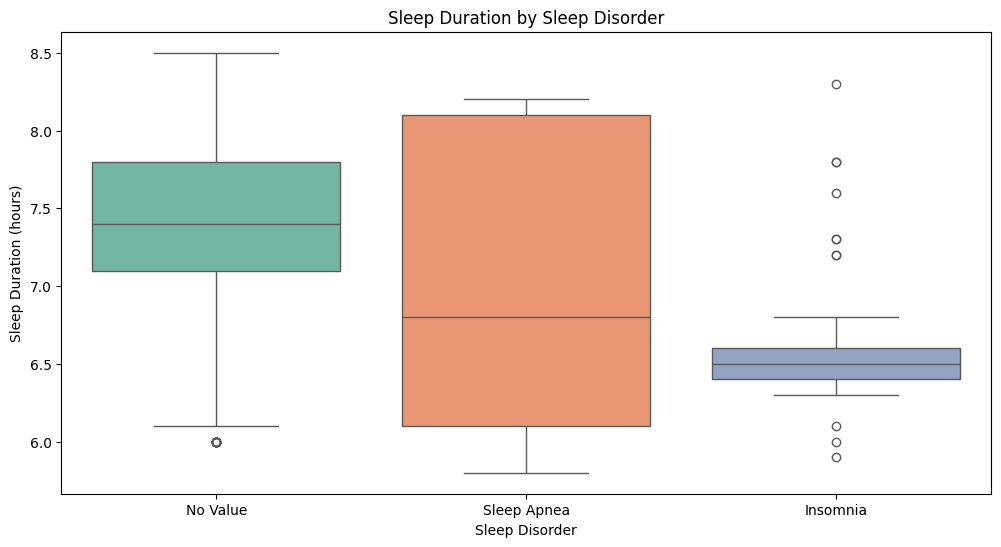

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Sleep Disorder', y='Sleep Duration', palette='Set2')
plt.title('Sleep Duration by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration (hours)')
plt.show()


4.1.3. Correlation Heatmap: Numerical Features
A heatmap displays the correlation between numerical variables.
This plot is useful for identifying strong relationships between features.

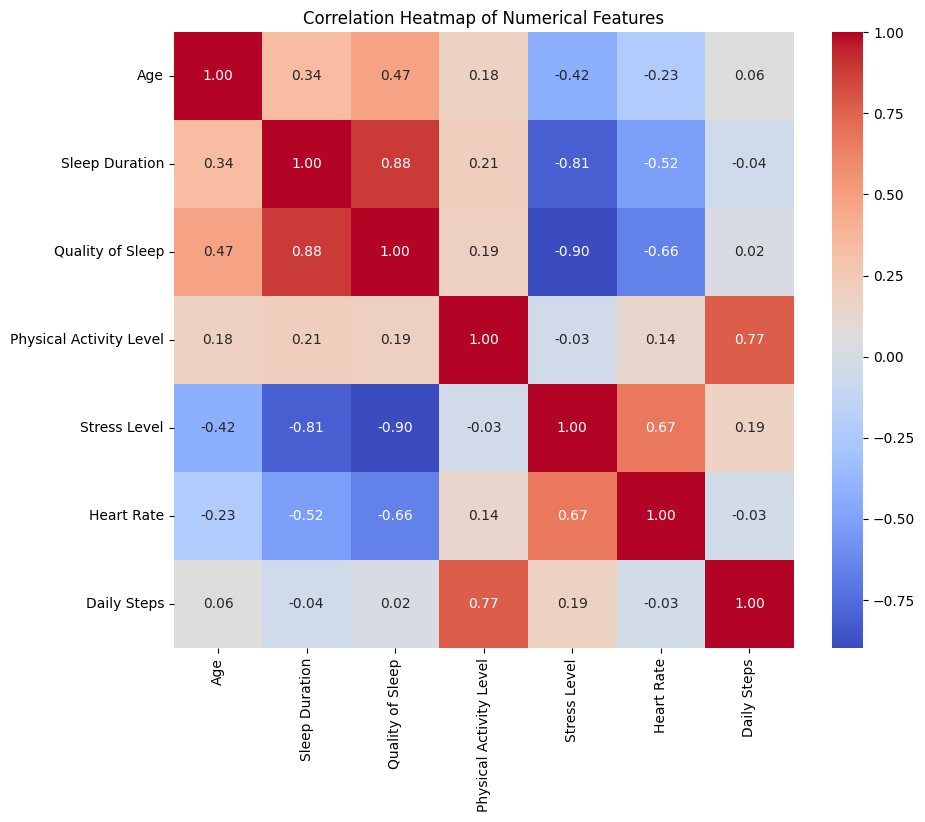

In [39]:
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# 5. Hypothesis Testing

# a. Does women’s sleep duration follow a normal distribution?

- Null Hypothesis (H₀): The sleep duration of women follows a normal distribution.
- Alternative Hypothesis (H₁): The sleep duration of women does not follow a normal distribution.

## Test Selection
We will use the Shapiro-Wilk Test to evaluate normality because it is effective for small to medium-sized datasets. Additionally, we will visualize the distribution using:
- Histogram with KDE (Kernel Density Estimate): To observe the shape of the distribution.
- Q-Q Plot (Quantile-Quantile Plot): To compare the sample distribution with a theoretical normal distribution.

## Decision Criteria

Significance Level (α): 0.05
- If the p-value > 0.05, we fail to reject the null hypothesis (data is normal).
- If the p-value ≤ 0.05, we reject the null hypothesis (data is not normal).

Shapiro-Wilk Test Statistic: 0.8985768556594849, p-value: 6.360978965780362e-10
Reject the null hypothesis: The sleep duration does not follow a normal distribution.


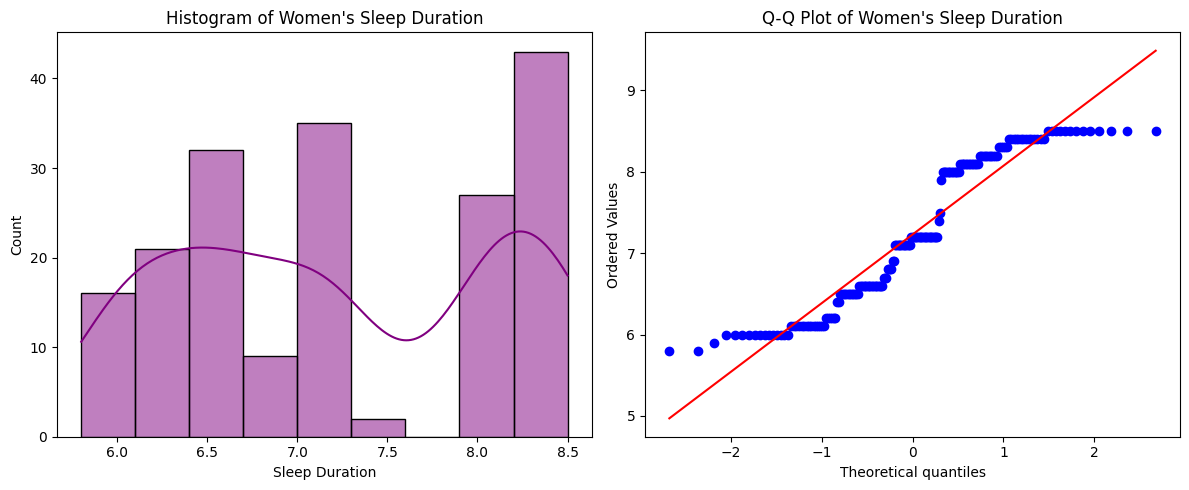

In [11]:
from scipy.stats import shapiro, probplot

women_sleep_duration = data[data['Gender'] == 'Female']['Sleep Duration'].dropna()

# Shapiro-Wilk Test
stat, p_value = shapiro(women_sleep_duration)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

# Decision
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: The sleep duration follows a normal distribution.")
else:
    print("Reject the null hypothesis: The sleep duration does not follow a normal distribution.")

# Visualization: Histogram and Q-Q Plot
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(women_sleep_duration, kde=True, color='purple')
plt.title("Histogram of Women's Sleep Duration")

# Q-Q Plot
plt.subplot(1, 2, 2)
probplot(women_sleep_duration, dist="norm", plot=plt)
plt.title("Q-Q Plot of Women's Sleep Duration")

plt.tight_layout()
plt.show()


# b. Is having higher daily steps a contributing factor into better sleep? Check the corresponding correlation of Daily Steps and Quality of Sleep

- Null Hypothesis (H₀): There is no significant correlation between Daily Steps and Quality of Sleep.
- Alternative Hypothesis (H₁): There is a significant correlation between Daily Steps and Quality of Sleep.

# Method
Correlation Calculation:
Use the Pearson correlation coefficient to quantify the strength and direction of the linear relationship between the two variables.
Values range from -1 to 1, where:
- +1 indicates a strong positive correlation.
- -1 indicates a strong negative correlation.
- 0 indicates no correlation.

# Statistical Significance:
Calculate the p-value to determine whether the correlation is statistically significant.
A p-value < 0.05 indicates a statistically significant correlation.

# Visualization:
Create a scatter plot with a regression line to visually assess the relationship.


Pearson Correlation Coefficient: 0.02
P-value: 0.746190665296111
There is NO significant correlation between daily steps and quality of sleep.


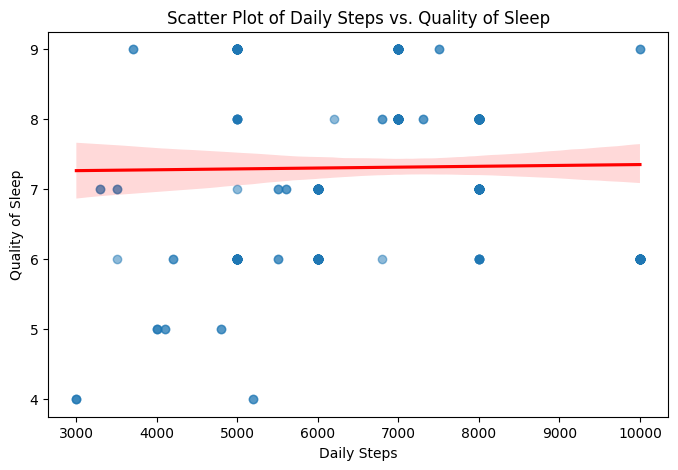

In [12]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(data['Daily Steps'], data['Quality of Sleep'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant correlation between daily steps and quality of sleep.")
else:
    print("There is NO significant correlation between daily steps and quality of sleep.")
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Daily Steps', y='Quality of Sleep', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Scatter Plot of Daily Steps vs. Quality of Sleep")
plt.xlabel("Daily Steps")
plt.ylabel("Quality of Sleep")
plt.show()

# c. Is stress level different among different occupations? 

Since we want to compare the stress level among different occupations, we need to test whether the mean stress levels differ significantly between groups (occupations).

The appropriate statistical test for comparing means across multiple groups is the one-way ANOVA (Analysis of Variance).

Why One-Way ANOVA?
- We are comparing more than two groups (different occupations).
- The dependent variable (Stress Level) is numerical, and the independent variable (Occupation) is categorical.

# Hypotheses:
- Null Hypothesis (H₀): The mean stress level is the same across all occupations.
- Alternative Hypothesis (H₁): The mean stress level differs among occupations.

# Perform One-Way ANOVA:
- If p-value < 0.05, we reject the null hypothesis and conclude that at least one group mean differs.
- If p-value ≥ 0.05, we fail to reject the null hypothesis, meaning no significant difference in stress levels among occupations.

Post Hoc Analysis (if ANOVA is significant):

Perform Tukey's HSD (Honestly Significant Difference) test to identify which groups differ.
# Visualization:

Plot a bar chart showing the average stress level for each occupation to visualize the differences.

# Result:
Since the p-value < 0.05 we reject the null hypothesis

ANOVA result: F=21.63598878521177, p=1.355091231304278e-31
Reject the null hypothesis


C:\Users\Sara\AppData\Local\Temp\ipykernel_10664\866823353.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="Occupation", y="Stress Level", data=data, ci=95, palette="Set2")
C:\Users\Sara\AppData\Local\Temp\ipykernel_10664\866823353.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Occupation", y="Stress Level", data=data, ci=95, palette="Set2")


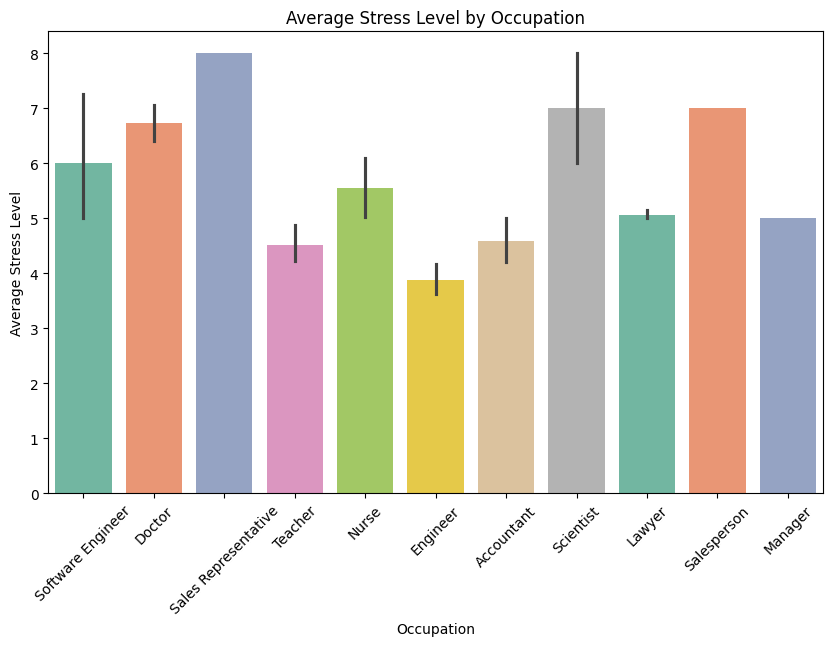

In [17]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data = data.dropna(subset=["Occupation", "Stress Level"])

anova_result = stats.f_oneway(*[data[data["Occupation"] == occ]["Stress Level"] for occ in data["Occupation"].unique()])

print(f"ANOVA result: F={anova_result.statistic}, p={anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to Reject the null hypothesis")

plt.figure(figsize=(10, 6))
sns.barplot(x="Occupation", y="Stress Level", data=data, ci=95, palette="Set2")
plt.title("Average Stress Level by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Stress Level")
plt.xticks(rotation=45)
plt.show()


# d. Are different BMI categories significantly different given their blood pressure? 


We are testing whether blood pressure (systolic and diastolic) differs significantly between different BMI categories.

### Hypotheses:

- Null Hypothesis (H₀): There is no significant difference in the mean blood pressure (systolic and diastolic) between different BMI categories.
- Alternative Hypothesis (H₁): There is a significant difference in the mean blood pressure (systolic and/or diastolic) between at least one pair of BMI categories.
   

### Explanation:
- We apply a One-Way ANOVA to test if there are statistically significant differences in the mean blood pressure across the different BMI categories.
- If the **p-value** from the ANOVA test is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in blood pressure between at least one of the BMI categories.



Applying One-Way ANOVA for Systolic Pressure:
Systolic Pressure - Statistic: 163.545195439236, p-value: 1.743876808083431e-67

Applying One-Way ANOVA for Diastolic Pressure:
Diastolic Pressure - Statistic: 179.09700388935, p-value: 1.0189415858614994e-71


Systolic blood pressure is significantly different among BMI categories.
Diastolic blood pressure is significantly different among BMI categories.


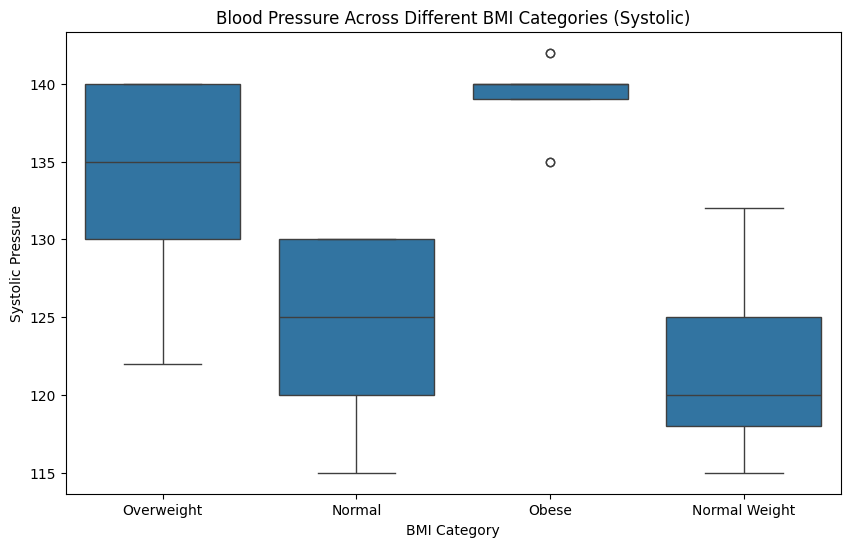

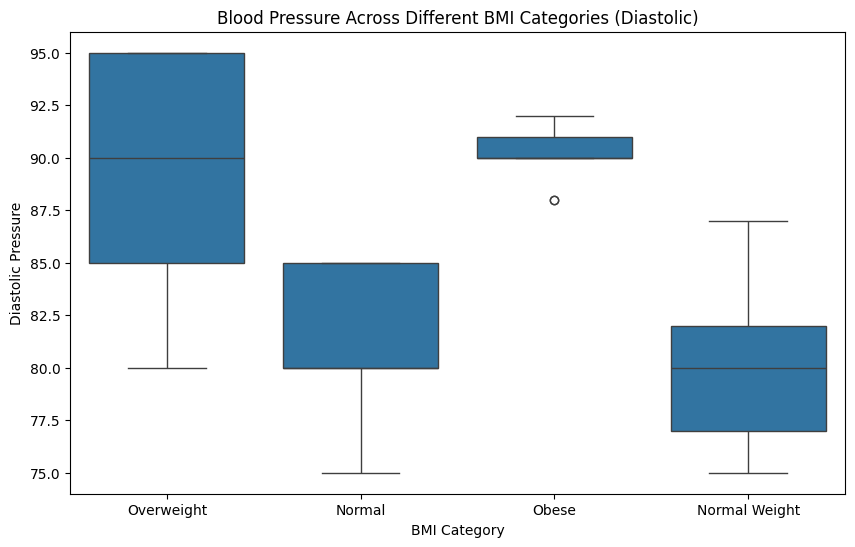

In [42]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

# One-Way ANOVA for Systolic Pressure
print("\nApplying One-Way ANOVA for Systolic Pressure:")
anova_result_systolic = stats.f_oneway(*(data.loc[data['BMI Category'] == category, 'Systolic'].dropna() 
                                          for category in data['BMI Category'].unique()))

print(f"Systolic Pressure - Statistic: {anova_result_systolic.statistic}, p-value: {anova_result_systolic.pvalue}")

# One-Way ANOVA for Diastolic Pressure
print("\nApplying One-Way ANOVA for Diastolic Pressure:")
anova_result_diastolic = stats.f_oneway(*(data.loc[data['BMI Category'] == category, 'Diastolic'].dropna() 
                                           for category in data['BMI Category'].unique()))

print(f"Diastolic Pressure - Statistic: {anova_result_diastolic.statistic}, p-value: {anova_result_diastolic.pvalue}")

print("\n")
if anova_result_systolic.pvalue < 0.05:
    print("Systolic blood pressure is significantly different among BMI categories.")
else:
    print("Systolic blood pressure is NOT significantly different among BMI categories.")

if anova_result_diastolic.pvalue < 0.05:
    print("Diastolic blood pressure is significantly different among BMI categories.")
else:
    print("Diastolic blood pressure is NOT significantly different among BMI categories.")

# Visualization - Boxplot for Systolic Pressure
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Systolic', data=data)
plt.title("Blood Pressure Across Different BMI Categories (Systolic)")
plt.xlabel("BMI Category")
plt.ylabel("Systolic Pressure")
plt.show()

# Visualization - Boxplot for Diastolic Pressure
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Diastolic', data=data)
plt.title("Blood Pressure Across Different BMI Categories (Diastolic)")
plt.xlabel("BMI Category")
plt.ylabel("Diastolic Pressure")
plt.show()


# e. Do people with sleep disorders have higher heart rates than those without any sleep disorder?

We will perform an Independent t-test to compare the mean heart rates between two groups:
- People with sleep disorders
- People without sleep disorders
# Hypotheses:
- Null Hypothesis (H₀): There is no difference in mean heart rates between people with and without sleep disorders. 
- Alternative Hypothesis (H₁): People with sleep disorders have higher mean heart rates than those without.

T-statistic: 6.74833933997991
P-value: 2.8747938607376974e-11
Reject the null hypothesis: People with sleep disorders have significantly higher heart rates.


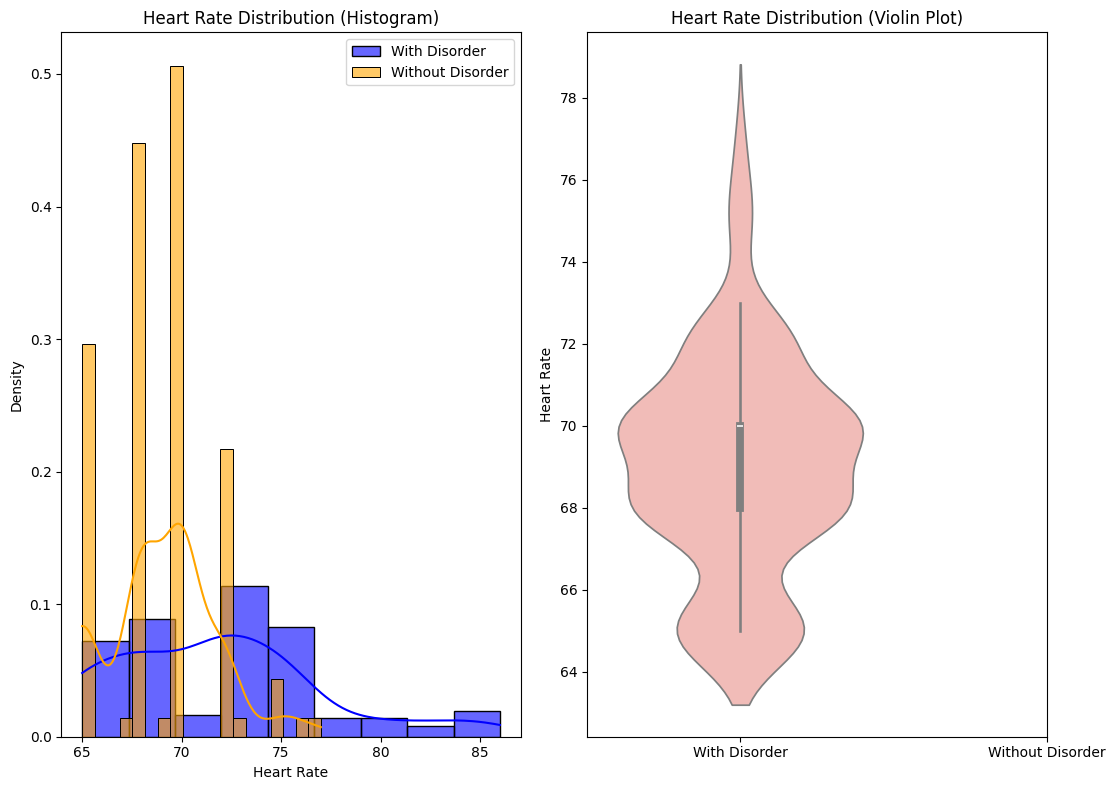

In [54]:
import pandas as pd
import scipy.stats as stats


with_disorder = data[data['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea'])]['Heart Rate']
without_disorder = data[data['Sleep Disorder'] == 'No Value']['Heart Rate']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(with_disorder, without_disorder, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: People with sleep disorders have significantly higher heart rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in heart rates.")

plt.figure(figsize=(16, 8))

# Histogram
plt.subplot(1, 3, 2)
sns.histplot(with_disorder, color='blue', kde=True, label='With Disorder', stat='density', alpha=0.6)
sns.histplot(without_disorder, color='orange', kde=True, label='Without Disorder', stat='density', alpha=0.6)
plt.title('Heart Rate Distribution (Histogram)')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.legend()

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=[with_disorder, without_disorder], palette='Pastel1')
plt.xticks([0, 1], ['With Disorder', 'Without Disorder'])
plt.title('Heart Rate Distribution (Violin Plot)')
plt.ylabel('Heart Rate')

# Show all plots
plt.tight_layout()
plt.show()

# 6. Bonus

# f. Sleep Quality and Stress Level:
Check whether there is a significant negative correlation between sleep quality and stress level.

# Hypotheses:

- Null: No correlation between sleep quality and stress level.
- Alternative: Negative correlation between sleep quality and stress level.

# Test:
We utilized Pearson correlation analysis to assess the strength and direction of relationships

# Visualization:
A scatter plot is used to visualize the relationship between sleep quality and stress level. This helps in identifying any correlation.


Correlation: -0.8987520310040419, P-value: 2.880124240941155e-135
Reject the null hypothesis: There is a significant negative correlation between sleep quality and stress level.


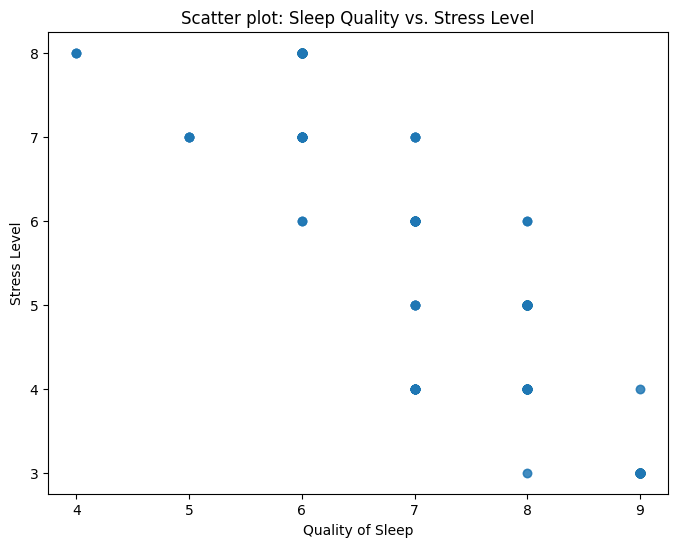

In [60]:
correlation, p_value = stats.pearsonr(data['Quality of Sleep'], data['Stress Level'])

# Print the result
print(f"Correlation: {correlation}, P-value: {p_value}")

# Interpretation based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant negative correlation between sleep quality and stress level.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between sleep quality and stress level.")

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Quality of Sleep'], data['Stress Level'], alpha=0.6)
plt.title("Scatter plot: Sleep Quality vs. Stress Level")
plt.xlabel("Quality of Sleep")
plt.ylabel("Stress Level")
plt.show()


# f. Gender and Sleep Disorder:
Check whether sleep disorder occurrence is independent of gender.

# Hypotheses:

- Null: Sleep disorder occurrence is independent of gender.
- Alternative: Sleep disorder occurrence is dependent on gender.

# Test:
We employed the Chi-squared (χ²) test to examine the association between categorical variables.

# Visualization:

A stacked bar plot is used to show the distribution of sleep disorder occurrences across genders.

Chi-Square Statistic: 54.30602007353474, P-value: 1.6128633524576768e-12
Reject the null hypothesis: Sleep disorder occurrence is dependent on gender.


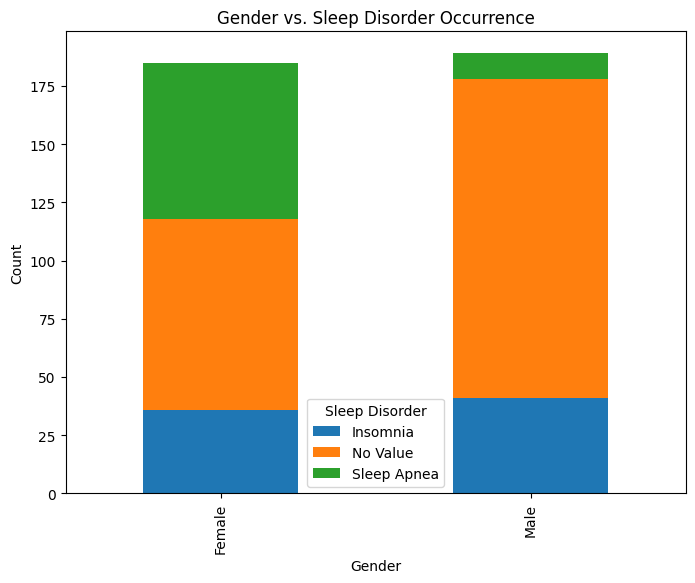

In [ ]:
# Perform Chi-Square test
contingency = pd.crosstab(df['Gender'], df['Sleep Disorder'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print(f"Chi-Square Statistic: {chi2}, P-value: {p_value}")

# Interpretation based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Sleep disorder occurrence is dependent on gender.")
else:
    print("Fail to reject the null hypothesis: Sleep disorder occurrence is independent of gender.")

contingency.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Gender vs. Sleep Disorder Occurrence")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# Conclusion:
This study revealed significant associations between sleep health and factors such as age, gender, stress levels, and BMI. Notably, we observed a negative correlation between age and sleep duration, a higher prevalence of sleep apnea among women, and a substantial impact of stress on sleep quality. These findings highlight the need for personalized interventions aimed at enhancing sleep health. Future research could focus on analyzing longitudinal data to establish causality and explore the influence of other lifestyle factors.

# Future Work:
In future work, incorporating machine learning models to predict sleep quality based on demographic and lifestyle factors could provide valuable insights. Additionally, exploring longitudinal data may help identify trends over time and assess the long-term impact of interventions. Including more diverse datasets from different populations could enhance the generalizability of the findings.